In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns',21)
df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


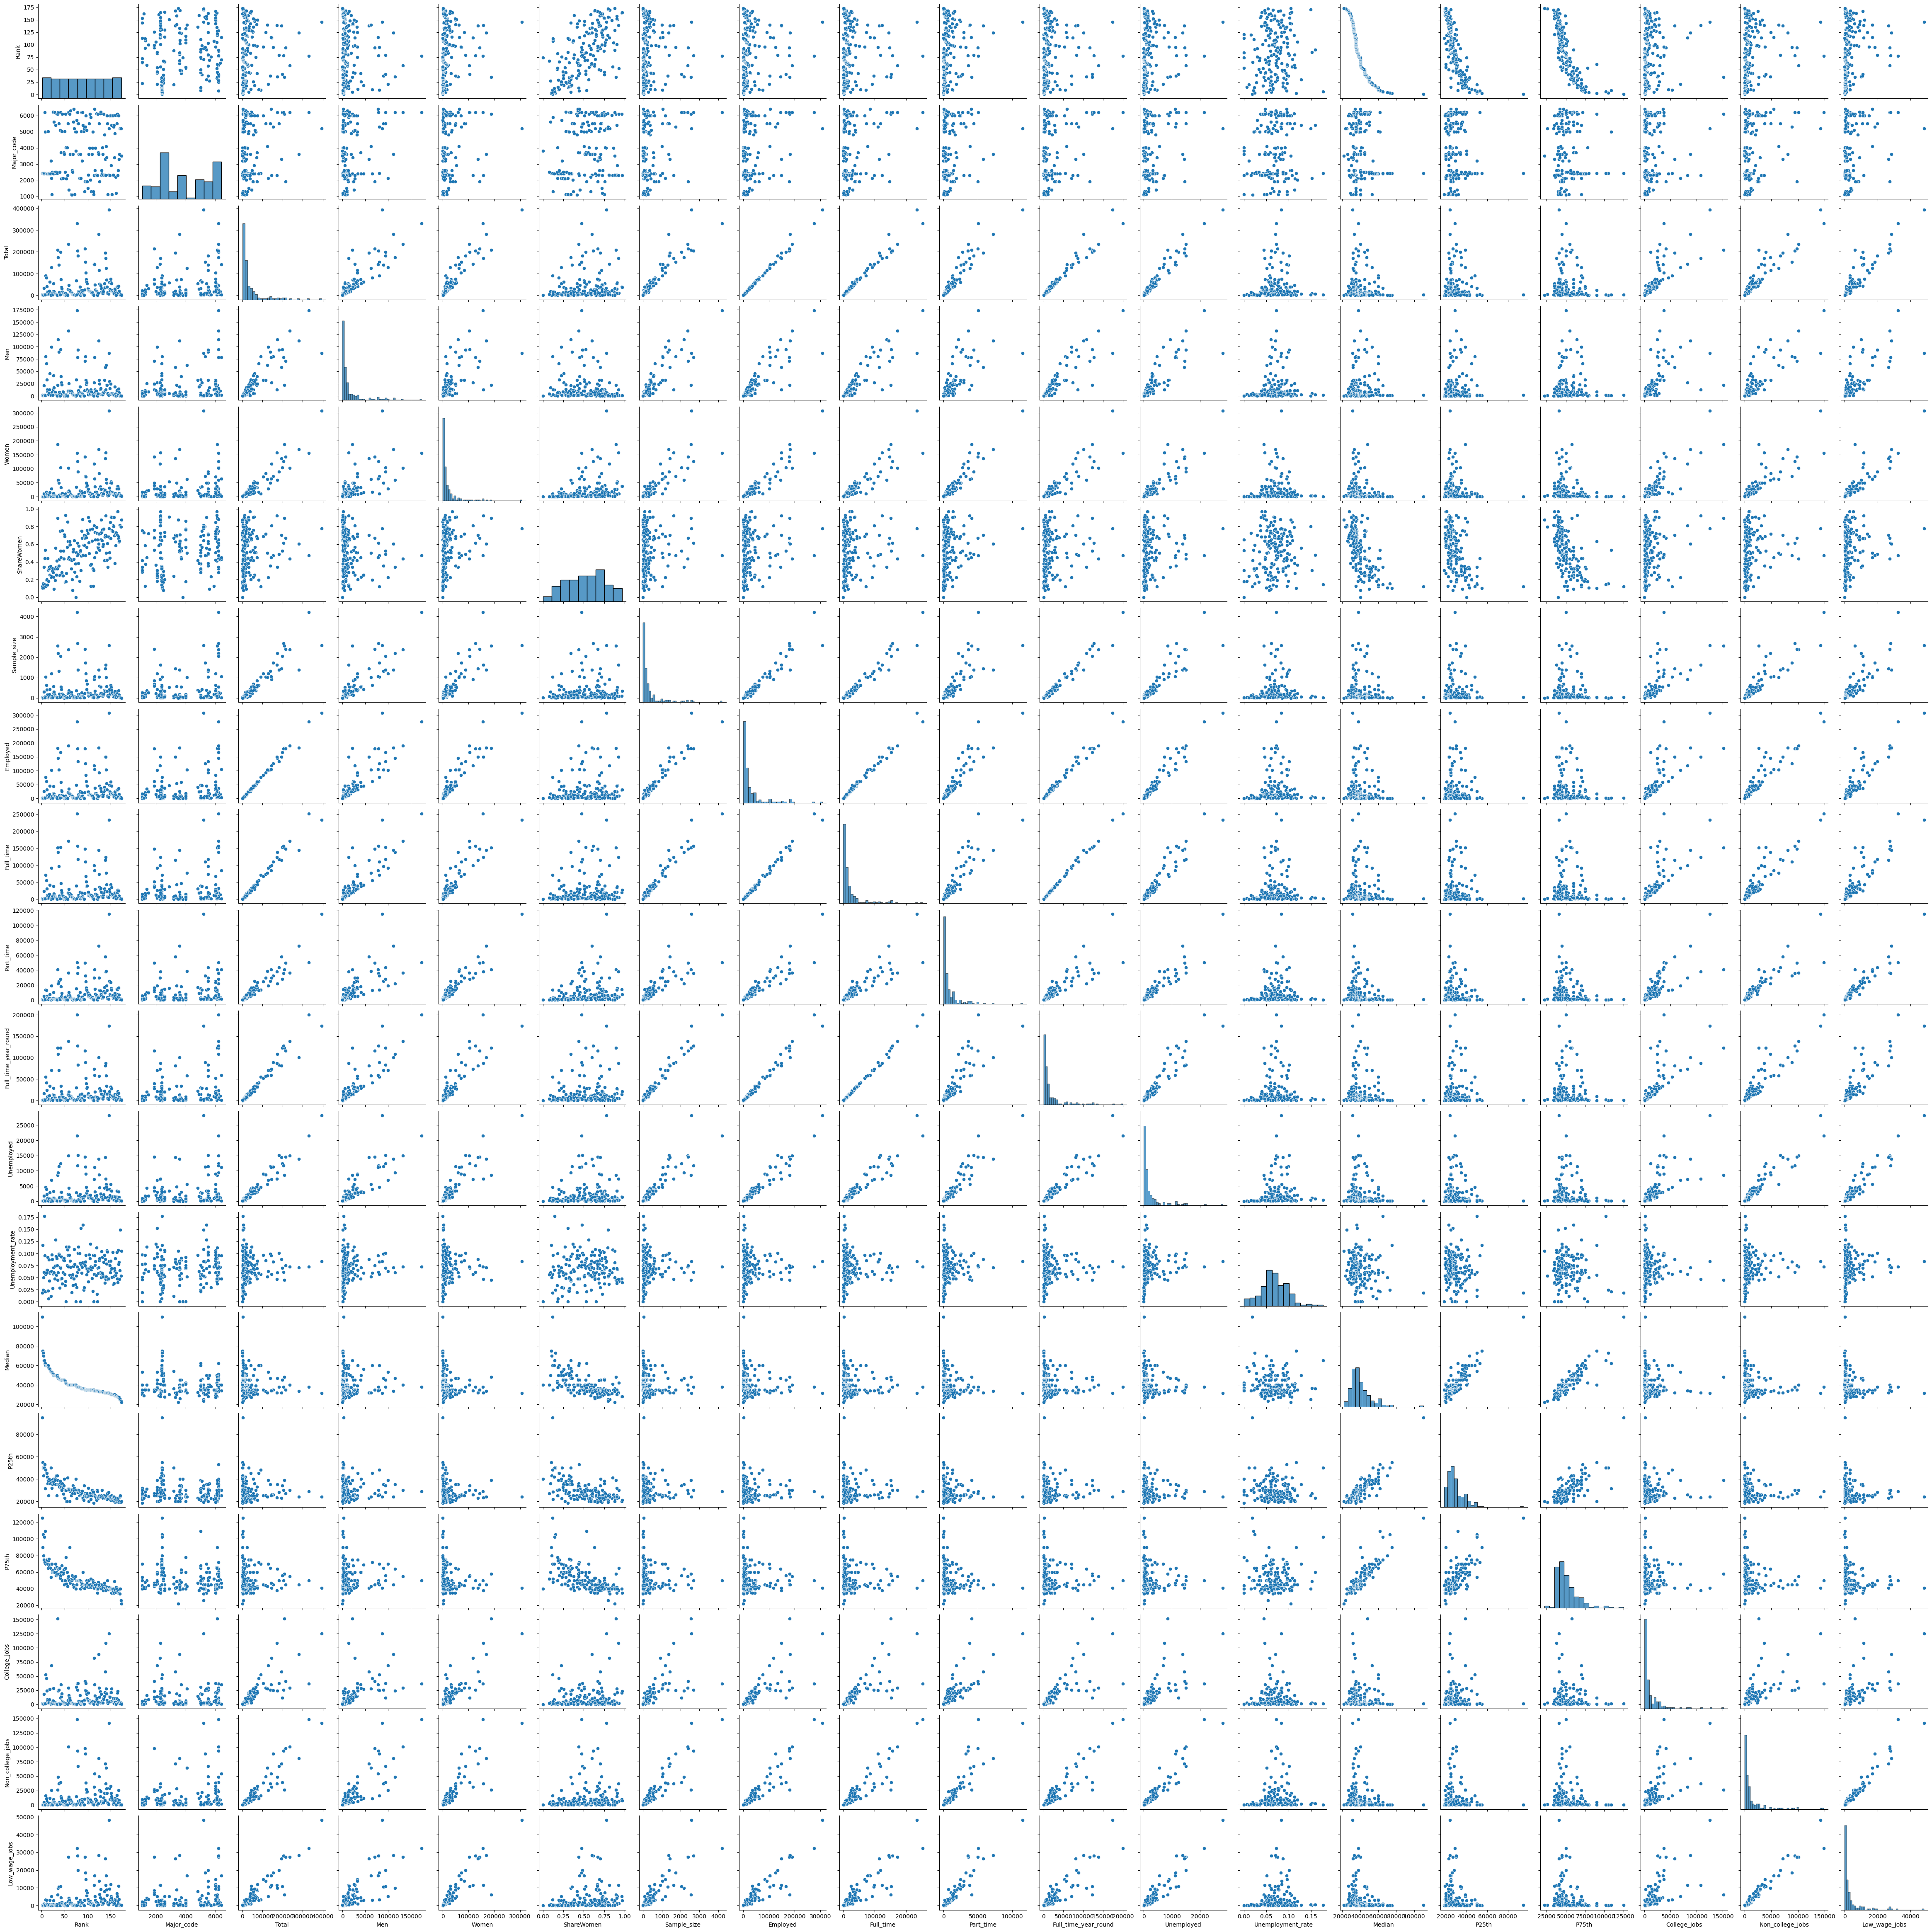

In [4]:
sns.pairplot(df)

<Axes: xlabel='Rank'>

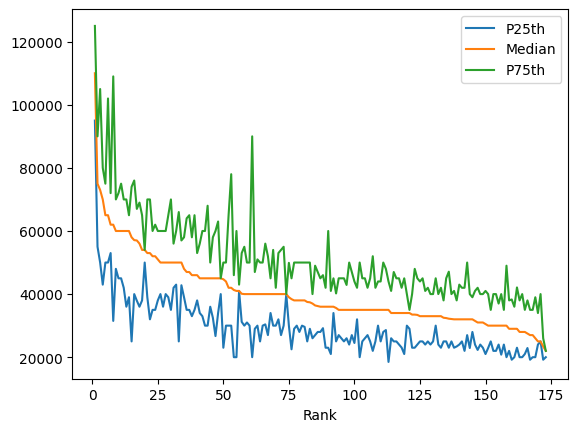

In [18]:
# major = np.array(df['Major'])
# #print((major))
# num = np.unique_counts(major)
# print(num[1])
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

In [13]:
major_group=df.groupby('Major')
major_group['Median'].max()

Major
ACCOUNTING                                  45000
ACTUARIAL SCIENCE                           62000
ADVERTISING AND PUBLIC RELATIONS            35000
AEROSPACE ENGINEERING                       60000
AGRICULTURAL ECONOMICS                      40000
                                            ...  
TRANSPORTATION SCIENCES AND TECHNOLOGIES    35000
TREATMENT THERAPY PROFESSIONS               33000
UNITED STATES HISTORY                       40000
VISUAL AND PERFORMING ARTS                  30000
ZOOLOGY                                     26000
Name: Median, Length: 173, dtype: int64

40151.45


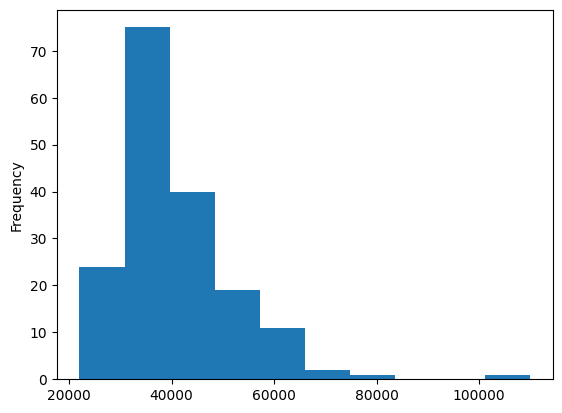

In [26]:
#print(f"Least median income: {np.min(median_income)} \nHighest median income: {np.max(median_income)}")
# plt.hist(df["Median"])
# plt.xlabel('Income(in $10,000 slabs)')
# plt.ylabel('Frequency')
median_column = df['Median']
plt.hist(median_column,bins=10)
plt.ylabel('Frequency')
print(round(np.mean(median_column),2))

In [27]:
top_5 = df.sort_values(by="Median",ascending=False).head()
top_5

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


<Axes: xlabel='Major'>

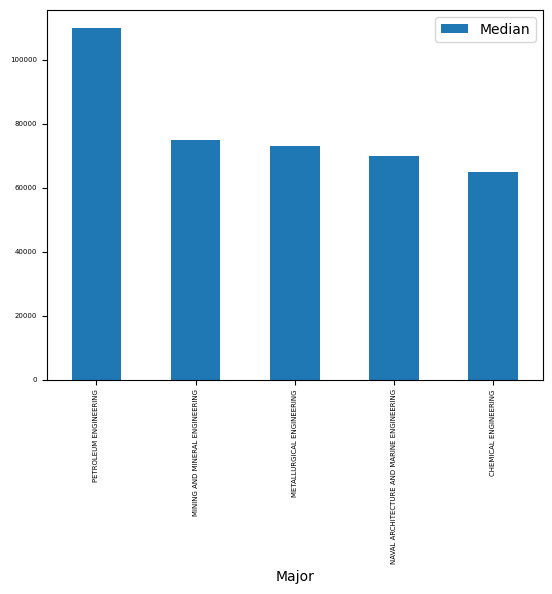

In [28]:
top_5.plot(x="Major",y="Median",kind="bar",fontsize=5)

In [35]:
top_median = df[df['Median']>60000].sort_values('Median')
#top_medians = df[df["Median"] > 60000].sort_values("Median")

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193


<Axes: xlabel='Major'>

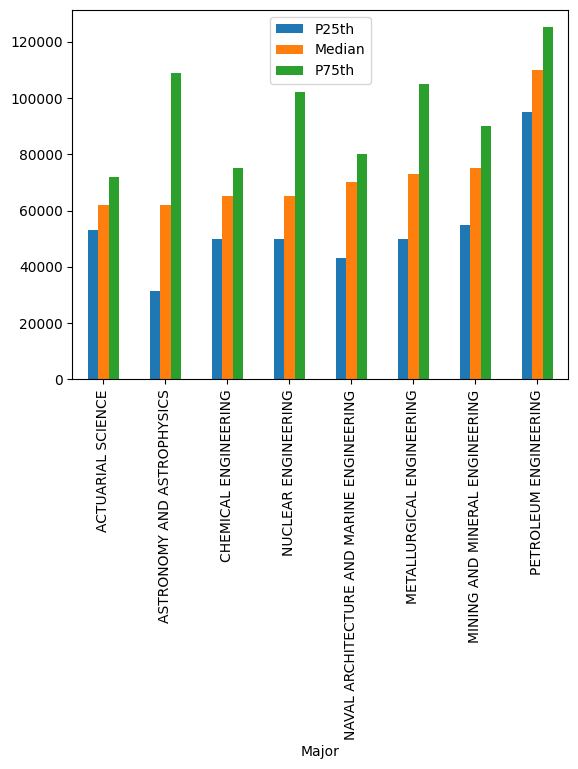

In [38]:
top_median.plot(x='Major',y=['P25th','Median','P75th'],kind='bar')

Text(0.5, 1.0, 'Correlation of High Median salary and Unemployment Rate is: -0.11')

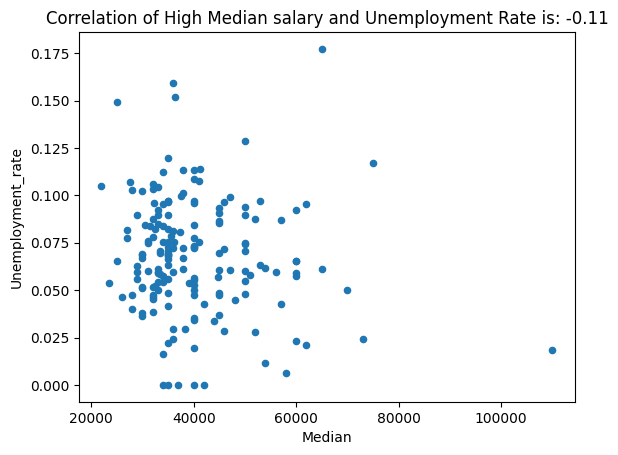

In [45]:
unemployment_median = np.corrcoef(np.array(df['Median']),np.array(df['Unemployment_rate']))
df.plot(x='Median',y='Unemployment_rate',kind='scatter')
plt.title(f'Correlation of High Median salary and Unemployment Rate is: {round(unemployment_median[0,1],2)}')

In [69]:
category = df.groupby('Major_category')['Total'].sum()
category=category.sort_values()
category

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

<Axes: ylabel='Major_category'>

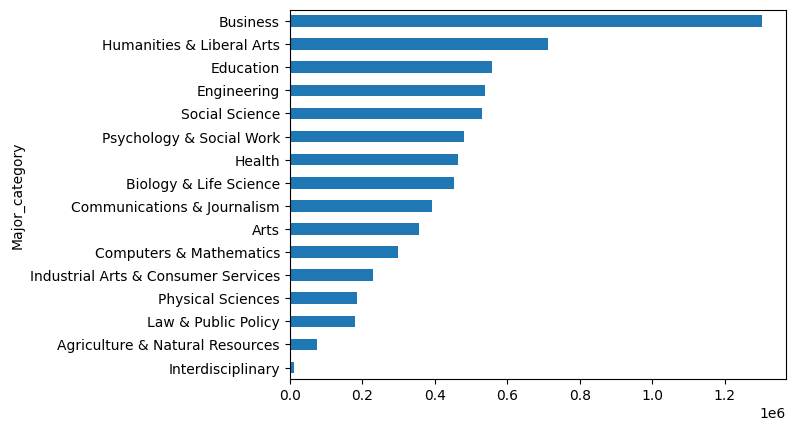

In [68]:
category.plot(kind='barh',fontsize=10)

<Axes: ylabel='Frequency'>

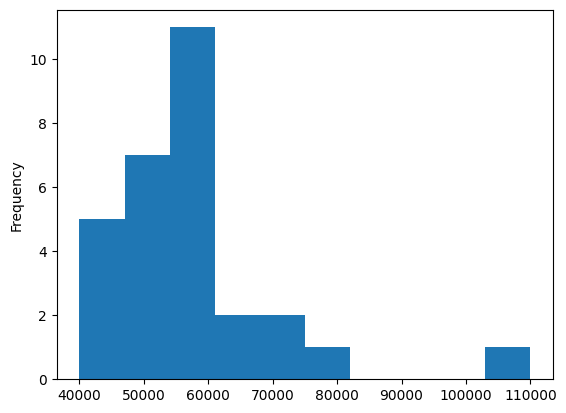

In [78]:
df[df['Major_category']=='Engineering']['Median'].plot(kind='hist')
# df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")